In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
data = pd.read_csv('Combined_Normalized_and_Outlier_Corrected_Data.csv')

In [3]:
spectra = data.iloc[:, :-1]
label = data.iloc[:, -1]

In [4]:
X_train, X_temp, Y_train, Y_temp = train_test_split(spectra, label, test_size= 0.5, random_state= 69, stratify= label)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size= 0.5, random_state= 69, stratify = Y_temp)

In [5]:
randoForest = RandomForestClassifier(n_estimators= 100, random_state= 69)
randoForest.fit(X_train,Y_train)

RandomForestClassifier(random_state=69)

In [6]:
validation_predict = randoForest.predict(X_val)
validation_proba = randoForest.predict_proba(X_val)

label_indices = [list(randoForest.classes_).index(label) for label in validation_predict]
predicted_val_proba = [validation_proba[i, label_idx] for i, label_idx in enumerate(label_indices)]

print(classification_report(Y_val,validation_predict))
print("Accuracy", accuracy_score(Y_val, validation_predict))

                precision    recall  f1-score   support

   C. striatum       0.98      0.97      0.97       100
   E. faecalis       0.97      0.94      0.95       100
        E.coli       0.97      0.95      0.96       100
 P. aeruginosa       0.94      0.99      0.97       100
     S. aureus       0.93      0.99      0.96       100
S. maltophilia       0.98      0.92      0.95       100

      accuracy                           0.96       600
     macro avg       0.96      0.96      0.96       600
  weighted avg       0.96      0.96      0.96       600

Accuracy 0.96


In [7]:
test_predict =randoForest.predict(X_test)

print(classification_report(Y_test,test_predict))
print("Accuracy", accuracy_score(Y_test, test_predict))

                precision    recall  f1-score   support

   C. striatum       0.99      0.99      0.99       100
   E. faecalis       0.91      0.96      0.94       100
        E.coli       0.95      0.95      0.95       100
 P. aeruginosa       0.95      0.96      0.96       100
     S. aureus       0.94      0.94      0.94       100
S. maltophilia       0.99      0.93      0.96       100

      accuracy                           0.95       600
     macro avg       0.96      0.95      0.96       600
  weighted avg       0.96      0.95      0.96       600

Accuracy 0.955


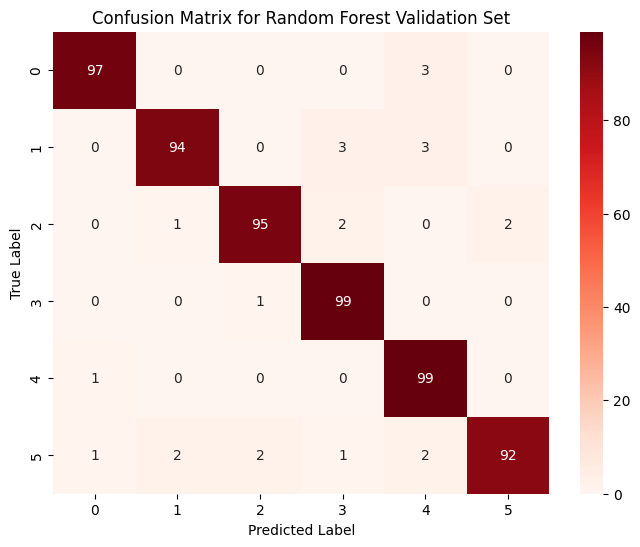

In [8]:
results_df = pd.DataFrame({'Predicted Label': validation_predict, 'Probability of Predicted Label': predicted_val_proba, 'True Label': Y_val})

true_labels = results_df["True Label"]
predicted_labels = results_df['Predicted Label']

confusionMatrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8,6))

sns.heatmap(confusionMatrix, annot= True, fmt ="d", cmap="Reds")

plt.title('Confusion Matrix for Random Forest Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [9]:
unique_labels = np.unique(np.concatenate((true_labels, predicted_labels)))
print("Order of labels in the confusion matrix:", unique_labels)

Order of labels in the confusion matrix: ['C. striatum' 'E. faecalis' 'E.coli' 'P. aeruginosa' 'S. aureus'
 'S. maltophilia']


In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [11]:
unlabeledData = pd.read_csv('Combined_Normalized_and_Outlier_Corrected_Data_unlabeled.csv')
labelData = pd.read_csv('Combined_Normalized_and_Outlier_Corrected_Data.csv')

labels = labelData.iloc[:,-1]

In [12]:
pca = PCA(n_components=2)
reducedData = pca.fit_transform(unlabeledData)

In [13]:
kmeans = KMeans(n_clusters= 6, random_state= 69)
cluster_labels = kmeans.fit_predict(reducedData)

c:\Users\elfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<>:13: SyntaxWarning: invalid escape sequence '\i'
<>:13: SyntaxWarning: invalid escape sequence '\i'
C:\Users\elfo\AppData\Local\Temp\ipykernel_76188\1927538270.py:13: SyntaxWarning: invalid escape sequence '\i'
  legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'$\it{{{label}}}$') for color, label in zip(colors, unique)]


['C. striatum' 'E.coli' 'E. faecalis' 'S. maltophilia' 'S. aureus'
 'P. aeruginosa']


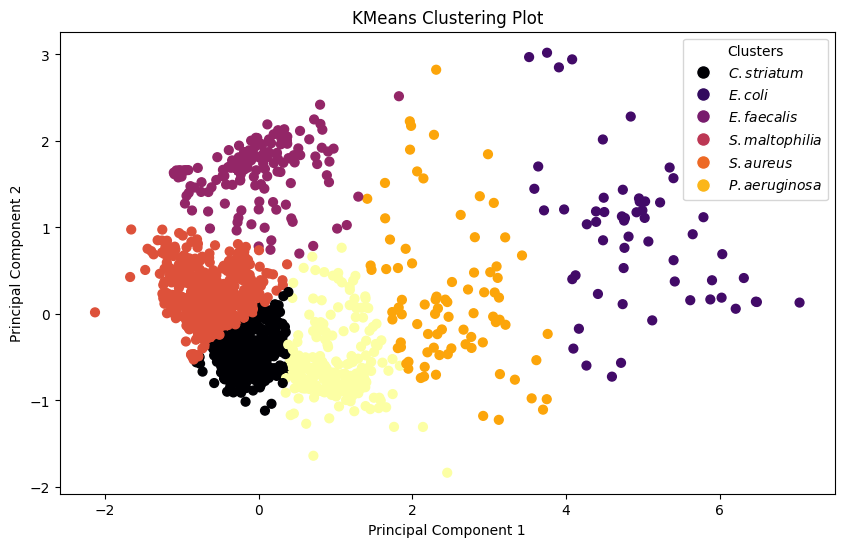

In [14]:
unique = labels.unique()
print(unique)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reducedData[:, 0], reducedData[:, 1], c=cluster_labels, cmap='inferno', marker='o',  s=40, alpha=1)
plt.title('KMeans Clustering Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

cmap = plt.get_cmap('inferno')
colors = [cmap(i / len(unique)) for i in range(len(unique))]

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'$\it{{{label}}}$') for color, label in zip(colors, unique)]
plt.legend(handles=legend_handles, title="Clusters")
plt.show()

In [18]:
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
dataset_pca = pd.DataFrame(abs(pca.components_), index = ['PC1', 'PC2'] )


print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.095].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.095].iloc[1]).dropna())

Cumulative variance explained by 2 principal components: 58.28%
As per PC 1:
 165    0.097208
166    0.095016
167    0.095163
168    0.095214
Name: PC1, dtype: float64


As per PC 2:
 32     0.110004
33     0.184901
34     0.238975
35     0.175801
86     0.105792
87     0.104894
88     0.098217
121    0.096807
122    0.143053
123    0.163206
124    0.133371
125    0.101530
201    0.115639
202    0.117685
203    0.119535
204    0.111638
205    0.110810
252    0.102153
253    0.118115
254    0.132566
255    0.139997
256    0.136211
257    0.140719
258    0.131962
259    0.127460
260    0.119434
261    0.104767
Name: PC2, dtype: float64


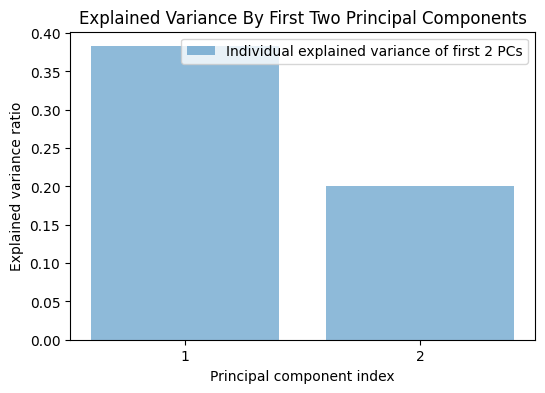

In [16]:
plt.figure(figsize=(6,4))
plt.bar(range(1, 3), pca.explained_variance_ratio_[:2], alpha=0.5, align='center', label='Individual explained variance of first 2 PCs')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.xticks([1, 2])  # Show ticks only for the first two components
plt.legend(loc='best')
plt.title('Explained Variance By First Two Principal Components')
plt.show()